In [19]:
import h5py
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from multicam.tng.utils import convert_tng_mass

In [20]:

# get gmass over all files 
subhalo_ids = []
subhalo_mass = []
subhalo_pos = []
# dm_central_ids = []

count = 0

for ii in tqdm(range(0, 600)):
    try: 
        filename = f'../../data/tng/300/fof_subhalo_tab_099.{ii}.hdf5'
        with h5py.File(filename, 'r') as f:
            if 'SubhaloMass' in f['Subhalo'].keys():
                for s in f['Subhalo']['SubhaloMass']:
                    subhalo_ids.append(count)
                    subhalo_mass.append(s)
                    count+=1
    except OSError:
        print(ii)
        continue


            # for pos in f['Subhalo']['SubhaloPos']:
            #     dm_subhalo_pos.append(pos)

            # if 'GroupFirstSub' in f['Group']:
            #     for central_id in f['Group']['GroupFirstSub']:
            #         dm_central_ids.append(central_id)


subhalo_ids = np.array(subhalo_ids)
# dm_subhalo_pos = np.array(dm_subhalo_pos)
subhalo_mass = convert_tng_mass(np.array(subhalo_mass))
# dm_central_ids = np.array(dm_central_ids)

subhalo_ids.shape, subhalo_mass.shape

# dm_central_ids.shape

100%|██████████| 600/600 [00:29<00:00, 20.15it/s]


((14485709,), (14485709,))

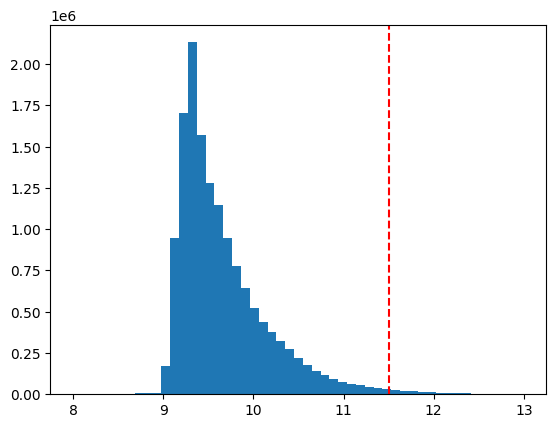

In [23]:
plt.hist(subhalo_mass, bins=51, range=(8, 13))
plt.axvline(11.5, color='r', linestyle='--');

In [22]:
# how many subhaloes in the mass bin (rough, should use mpeak_pre)
sum( (subhalo_mass> 11.5) & (subhalo_mass < 12.0))

95398

In [24]:
sum( (subhalo_mass> 11.8) & (subhalo_mass < 12.2))

45879